# Detect clear-sky data portion by PVlib
---

This notebook demonstrates how we use the [PVlib algorithm](https://pvlib-python.readthedocs.io/en/stable/reference/generated/pvlib.clearsky.detect_clearsky.html#pvlib.clearsky.detect_clearsky) to detect clear-sky data portions in our project.

In [1]:
import numpy as np
import pandas as pd

# Specify full or sample data.
all_sites_df = pd.read_csv("", parse_dates=['Datetime'])
all_sites_df

Datetime  generated_power  ambient_temp  measure_ghi  \
0       2022-01-01 03:00:00              0.0          33.0      0.00000   
1       2022-01-01 03:15:00              0.0          33.0      0.00000   
2       2022-01-01 03:30:00              0.0          33.0      0.00000   
3       2022-01-01 03:45:00              0.0          33.0      0.00000   
4       2022-01-01 04:00:00              0.0          33.0      0.00000   
...                     ...              ...           ...          ...   
1649461 2023-06-30 16:00:00             76.0          38.0     91.85729   
1649462 2023-06-30 16:15:00             92.0          38.0    107.00000   
1649463 2023-06-30 16:30:00             88.0          38.0    113.72660   
1649464 2023-06-30 16:45:00             88.0          39.0    108.15760   
1649465 2023-06-30 17:00:00             84.0          39.0    102.80760   

         py_module_temp site_name        date         zna         AM  \
0              18.80833   site001  2022-01-01  141.514849  37.919608   
1              18.48333   site001  2022-01-01  138.079752  37.919608   
2              18.17500   site001  2022-01-01  134.636034  37.919608   
3              18.41667   site001  2022-01-01  131.187305  37.919608   
4              18.69167   site001  2022-01-01  127.736451  37.919608   
...                 ...       ...         ...         ...        ...   
1649461        27.40833   site056  2023-06-30   52.170496   1.627733   
1649462        28.10833   site056  2023-06-30   55.617168   1.767078   
1649463        29.81667   site056  2023-06-30   59.062601   1.939965   
1649464        30.81667   site056  2023-06-30   62.504748   2.158500   
1649465        30.80000   site056  2023-06-30   65.941709   2.441486   

               Iclr   cos_zna         k       lat        long  
0          0.000000 -0.782769       NaN  14.00523  100.519403  
1          0.000000 -0.744075       NaN  14.00523  100.519403  
2          0.000000 -0.702601       NaN  14.00523  100.519403  
3          0.000000 -0.658523       NaN  14.00523  100.519403  
4          0.000000 -0.612030       NaN  14.00523  100.519403  
...             ...       ...       ...       ...         ...  
1649461  666.692427  0.613314  0.137781  13.50130  100.135400  
1649462  609.298561  0.564720  0.175612  13.50130  100.135400  
1649463  549.564992  0.514101  0.206939  13.50130  100.135400  
1649464  487.772006  0.461675  0.221738  13.50130  100.135400  
1649465  424.222383  0.407666  0.242344  13.50130  100.135400  

[1649466 rows x 14 columns]

In [4]:
from solar_utils.clearsky_detection import detect_clr_portion_pvlib
import importlib

# Show one-site example

importlib.reload(importlib.import_module('solar_utils.clearsky_detection'))
site_df = all_sites_df[all_sites_df['site_name']=='site034']
site_df.set_index('Datetime', inplace=True)
site_df = site_df.between_time("07:00", "17:00")
site_df.rename(columns={'measure_ghi': 'I'}, inplace=True)
site_df = site_df.reset_index()
window_length=45
max_diff=150
mean_diff=150 
slope_dev=100
freq='15min'
max_iterations = 30
detected_clr_ghi_df, detected_partly_clr_day_df, clr_date_list = detect_clr_portion_pvlib(site_df, window_length=window_length, max_diff=max_diff, mean_diff= mean_diff, 
                                                                                          freq=freq, slope_dev=slope_dev, max_iterations=max_iterations)

2022-01-01 is terminated
2022-01-02 is terminated
2022-01-03 is terminated
2022-01-04 is terminated
2022-01-05 is terminated
2022-01-08 is terminated
2022-01-09 is terminated
2022-01-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-01-18 is terminated
2022-01-20 is terminated
2022-01-25 is terminated
2022-01-26 is terminated
2022-01-28 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-02-05 is terminated
2022-02-06 is terminated
2022-02-08 is terminated
2022-02-09 is terminated
2022-02-10 is terminated
2022-02-11 is terminated
2022-02-12 is terminated
2022-02-13 is terminated
2022-02-14 is terminated
2022-02-15 is terminated
2022-02-16 is terminated
2022-02-17 is terminated
2022-02-18 is terminated
2022-02-20 is terminated
2022-02-22 is terminated
2022-02-23 is terminated
2022-02-25 is terminated
2022-02-26 is terminated
2022-02-28 is terminated
2022-03-01 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-03-03 is terminated
2022-03-04 is terminated
2022-03-06 is terminated
2022-03-08 is terminated
2022-03-09 is terminated
2022-03-10 is terminated
2022-03-14 is terminated
2022-03-18 is terminated
2022-03-19 is terminated
2022-03-20 is terminated
2022-03-21 is terminated
2022-03-22 is terminated
2022-03-23 is terminated
2022-03-25 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-02 is terminated
2022-04-03 is terminated
2022-04-04 is terminated
2022-04-05 is terminated
2022-04-06 is terminated
2022-04-08 is terminated
2022-04-11 is terminated
2022-04-12 is terminated
2022-04-13 is terminated
2022-04-14 is terminated
2022-04-16 is terminated
2022-04-17 is terminated
2022-04-18 is terminated
2022-04-19 is terminated
2022-04-20 is terminated
2022-04-21 is terminated
2022-04-22 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-04-26 is terminated
2022-04-29 is terminated
2022-04-30 is terminated
2022-05-01 is terminated
2022-05-03 is terminated
2022-05-04 is terminated
2022-05-05 is terminated
2022-05-06 is terminated
2022-05-07 is terminated
2022-05-08 is terminated
2022-05-09 is terminated
2022-05-10 is terminated
2022-05-11 is terminated
2022-05-16 is terminated
2022-05-17 is terminated
2022-05-18 is terminated
2022-05-19 is terminated
2022-05-20 is terminated
2022-05-21 is terminated
2022-05-22 is terminated
2022-05-23 is terminated
2022-05-27 is terminated
2022-05-28 is terminated
2022-05-29 is terminated
2022-05-30 is terminated
2022-06-02 is terminated
2022-06-03 is terminated
2022-06-04 is terminated
2022-06-05 is terminated
2022-06-06 is terminated
2022-06-07 is terminated
2022-06-08 is terminated
2022-06-10 is terminated
2022-06-11 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-06-18 is terminated
2022-06-19 is terminated
2022-06-20 is terminated
2022-06-22 is terminated
2022-06-25 is terminated
2022-06-26 is terminated
2022-06-30 is terminated
2022-07-01 is terminated
2022-07-02 is terminated
2022-07-03 is terminated
2022-07-04 is terminated
2022-07-05 is terminated
2022-07-06 is terminated
2022-07-07 is terminated
2022-07-08 is terminated
2022-07-09 is terminated
2022-07-10 is terminated
2022-07-11 is terminated
2022-07-12 is terminated
2022-07-13 is terminated
2022-07-14 is terminated
2022-07-15 is terminated
2022-07-16 is terminated
2022-07-17 is terminated
2022-07-19 is terminated
2022-07-21 is terminated
2022-07-23 is terminated
2022-07-25 is terminated
2022-07-27 is terminated
2022-07-28 is terminated
2022-07-29 is terminated
2022-07-30 is terminated
2022-07-31 is terminated
2022-08-01 is terminated
2022-08-02 is terminated
2022-08-03 is terminated
2022-08-04 is terminated
2022-08-05 is terminated
2022-08-06 is terminated
2022-08-07 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2022-12-01 is terminated
2022-12-02 is terminated
2022-12-03 is terminated
2022-12-04 is terminated
2022-12-05 is terminated
2022-12-06 is terminated
2022-12-07 is terminated
2022-12-08 is terminated
2022-12-09 is terminated
2022-12-10 is terminated
2022-12-11 is terminated
2022-12-12 is terminated
2022-12-13 is terminated
2022-12-14 is terminated
2022-12-15 is terminated
2022-12-17 is terminated
2022-12-18 is terminated
2022-12-19 is terminated
2022-12-20 is terminated
2022-12-21 is terminated
2022-12-22 is terminated
2022-12-26 is terminated
2022-12-28 is terminated
2022-12-29 is terminated
2022-12-30 is terminated
2022-12-31 is terminated
2023-01-01 is terminated
2023-01-03 is terminated
2023-01-04 is terminated
2023-01-06 is terminated
2023-01-07 is terminated
2023-01-08 is terminated
2023-01-09 is terminated
2023-01-10 is terminated
2023-01-11 is terminated
2023-01-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-01-18 is terminated
2023-01-19 is terminated
2023-01-20 is terminated
2023-01-21 is terminated
2023-01-25 is terminated
2023-01-26 is terminated
2023-01-27 is terminated
2023-01-28 is terminated
2023-01-29 is terminated
2023-01-30 is terminated
2023-01-31 is terminated
2023-02-01 is terminated
2023-02-02 is terminated
2023-02-03 is terminated
2023-02-04 is terminated
2023-02-09 is terminated
2023-02-10 is terminated
2023-02-11 is terminated
2023-02-13 is terminated
2023-02-16 is terminated
2023-02-17 is terminated
2023-02-18 is terminated
2023-02-19 is terminated
2023-02-20 is terminated
2023-02-21 is terminated
2023-02-22 is terminated
2023-02-24 is terminated
2023-02-25 is terminated
2023-02-26 is terminated
2023-02-27 is terminated
2023-02-28 is terminated
2023-03-01 is terminated
2023-03-02 is terminated
2023-03-03 is terminated
2023-03-04 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-03-09 is terminated
2023-03-10 is terminated
2023-03-11 is terminated
2023-03-12 is terminated
2023-03-13 is terminated
2023-03-15 is terminated
2023-03-19 is terminated
2023-03-21 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-05 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-04-10 is terminated
2023-04-11 is terminated
2023-04-12 is terminated
2023-04-13 is terminated
2023-04-14 is terminated
2023-04-15 is terminated
2023-04-16 is terminated
2023-04-18 is terminated
2023-04-19 is terminated
2023-04-20 is terminated
2023-04-22 is terminated
2023-04-24 is terminated
2023-04-25 is terminated
2023-04-27 is terminated
2023-04-28 is terminated
2023-05-01 is terminated
2023-05-02 is terminated
2023-05-03 is terminated
2023-05-04 is terminated
2023-05-06 is terminated
2023-05-07 is terminated
2023-05-10 is terminated
2023-05-13 is terminated
2023-05-15 is terminated
2023-05-16 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-05-25 is terminated
2023-05-26 is terminated
2023-05-28 is terminated
2023-05-30 is terminated
2023-05-31 is terminated
2023-06-01 is terminated
2023-06-05 is terminated
2023-06-06 is terminated
2023-06-07 is terminated
2023-06-08 is terminated
2023-06-09 is terminated
2023-06-10 is terminated
2023-06-11 is terminated
2023-06-12 is terminated
2023-06-13 is terminated


/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'
/Users/natanon.t/anaconda3/lib/python3.11/site-packages/pvlib/clearsky.py:900: RuntimeWarning: rescaling failed to converge after 30 iterations
  warnings.warn('rescaling failed to converge after %s iterations'


2023-06-16 is terminated
2023-06-17 is terminated
2023-06-18 is terminated
2023-06-19 is terminated
2023-06-22 is terminated
2023-06-25 is terminated
2023-06-27 is terminated
2023-06-29 is terminated


2022-01-06
2022-01-07
2022-01-10
2022-01-12
2022-01-13
2022-01-14
2022-01-15
2022-01-16
2022-01-17
2022-01-19
2022-01-21
2022-01-22
2022-01-23
2022-01-24
2022-01-27
2022-01-29
2022-01-30
2022-01-31
2022-02-01
2022-02-02
2022-02-03
2022-02-04
2022-02-07
2022-02-19
2022-02-21
2022-02-24
2022-02-27
2022-03-02
2022-03-05
2022-03-07
2022-03-11
2022-03-12
2022-03-13
2022-03-15
2022-03-16
2022-03-17
2022-03-24
2022-03-26
2022-03-27
2022-03-28
2022-03-29
2022-03-30
2022-03-31
2022-04-01
2022-04-07
2022-04-09
2022-04-10
2022-04-15
2022-04-23
2022-04-24
2022-04-25
2022-04-27
2022-04-28
2022-05-02
2022-05-12
2022-05-13
2022-05-14
2022-05-15
2022-05-24
2022-05-25
2022-05-26
2022-05-31
2022-06-01
2022-06-09
2022-06-12
2022-06-13
2022-06-14
2022-06-15
2022-06-16
2022-06-17
2022-06-21
2022-06-23
2022-06-24
2022-06-27
2022-06-28
2022-06-29
2022-07-18
2022-07-20
2022-07-22
2022-07-24
2022-07-26
2022-08-10
2022-08-12
2022-08-13
2022-08-14
2022-08-15
2022-08-19
2022-08-21
2022-08-22
2022-08-23
2022-08-31

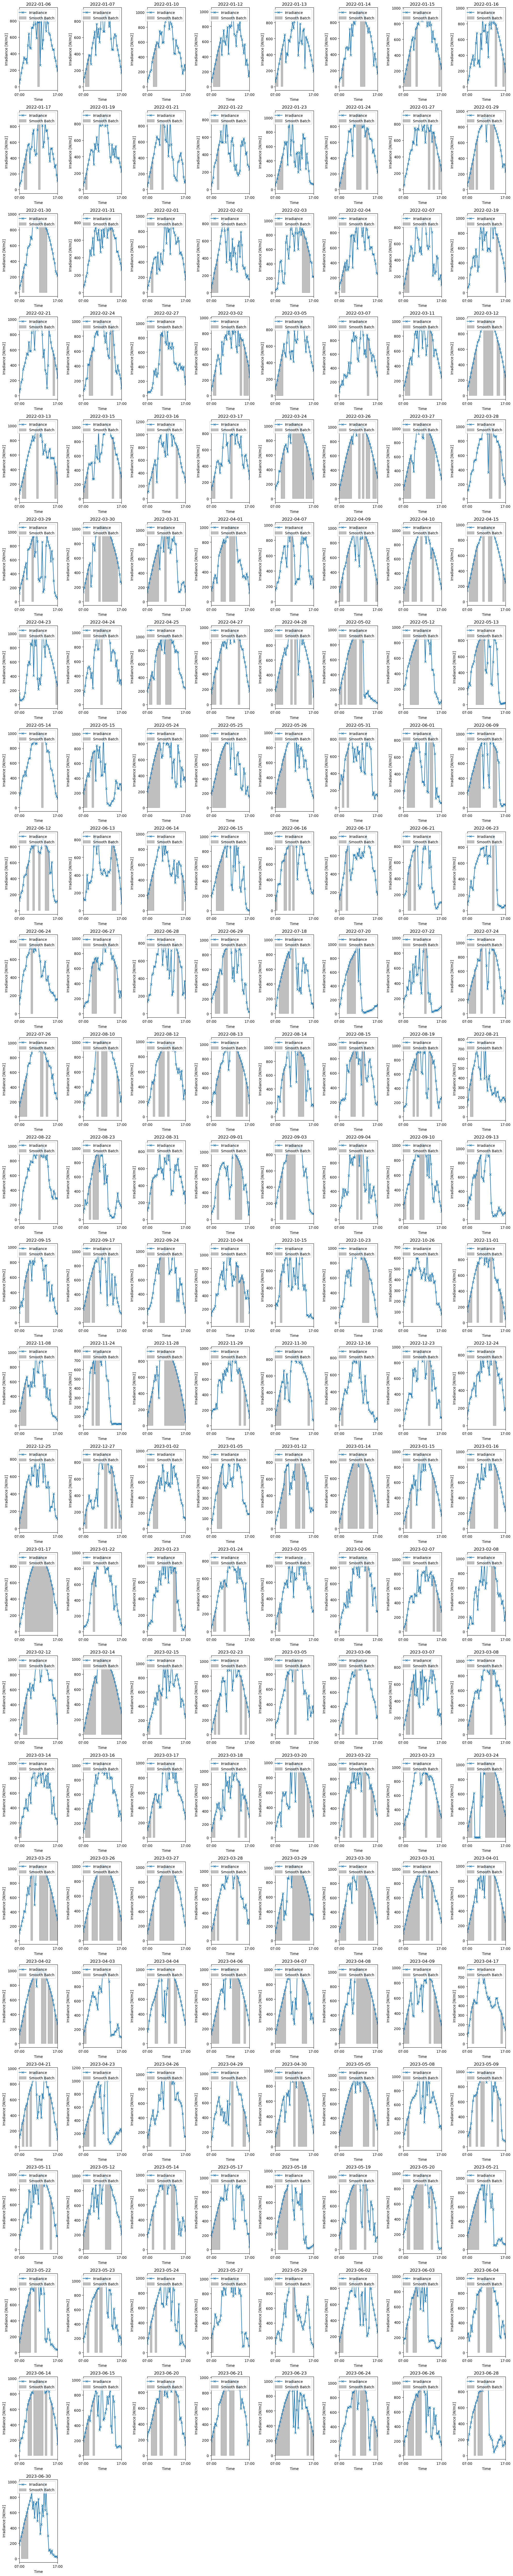

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Convert 'Datetime' column to datetime type and set it as the index
detected_partly_clr_day_df['Datetime'] = pd.to_datetime(detected_partly_clr_day_df['Datetime'])
detected_partly_clr_day_df.set_index('Datetime', inplace=True)

# Parameters for subplot layout
n_cols = 8  # Number of columns in the subplot grid
unique_dates = detected_partly_clr_day_df.index.date  # Get unique dates from the DataFrame
n_days = len(np.unique(unique_dates))  # Number of unique days
n_rows = (n_days + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Create a grid of subplots
axs = axs.flatten()  # Flatten the array of axes for easy iteration

# Plot each day's data
for idx, date in enumerate(np.unique(unique_dates)):
    print(date)
    day_df = detected_partly_clr_day_df[detected_partly_clr_day_df.index.date == date]  # Filter data for the current date
    
    ax = axs[idx]
    ax.plot(day_df.index, day_df['I'], marker='x', label='Irradiance')  # Plot irradiance data
    ax.fill_between(day_df.index, 0, day_df['I'], where=day_df['is_clr_point'], color='gray', alpha=0.5, label='Smooth Batch')  # Highlight clear-sky points
    
    ax.set_title(date)  # Set the title to the current date
    ax.set_xlabel('Time')  # Set the x-axis label
    ax.set_ylabel('Irradiance [W/m2]')  # Set the y-axis label
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the x-axis ticks
    ax.set_xticks([day_df.index[0].replace(hour=7, minute=0), day_df.index[0].replace(hour=17, minute=0)])  # Set x-axis ticks
    ax.set_xlim(day_df.index[0].replace(hour=7, minute=0), day_df.index[0].replace(hour=17, minute=0))  # Set x-axis limits
    ax.legend(loc='upper right')  # Add legend

# Remove unused subplots
for i in range(n_days, len(axs)):
    fig.delaxes(axs[i])

# Adjust layout
fig.tight_layout()
plt.show()
